In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

In [2]:
# Generation of our dataset (sine)
n = 10 # Number of points generated
x = np.linspace(0., 1., n)
s = np.sin(2. * np.pi * x)
# adding noise
t = s + np.random.normal(0.0, 0.15, n)

# HD curve for plotting smooth curves
hdn = 100
hdx = np.linspace(0., 1., hdn)
hds = np.sin(2. * np.pi * hdx)

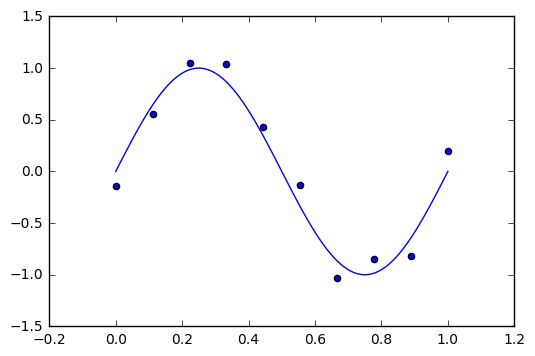

In [3]:
# Let's plot the sine curve plus our noisy dataset
plt.plot(hdx, hds)
plt.scatter(x, t)
plt.show()

In [4]:
# Compute the y of a polynomial function according to the weights
def poly(W, x):
    y = 0.
    px = 1.
    for i in range(len(W)):
        y = y + W[i] * px
        px = px * x
    return y
# Compute the cost function
# Mean Squarred Error
def mse(W, X, T):
    s = 0.
    for x, t in zip(X, T):
        s = s + (poly(W, x) - t)**2
    return s / 2.

In [5]:
# Derivative parts
W = [3, 2, 3, 4, 5]

# Manual derivatives
h = 0.001
mdmse = np.array([
    (mse([3+h, 2, 3, 4, 5], x, t) - mse(W, x, t)) / h,
    (mse([3, 2+h, 3, 4, 5], x, t) - mse(W, x, t)) / h,
    (mse([3, 2, 3+h, 4, 5], x, t) - mse(W, x, t)) / h,
    (mse([3, 2, 3, 4+h, 5], x, t) - mse(W, x, t)) / h,
    (mse([3, 2, 3, 4, 5+h], x, t) - mse(W, x, t)) / h,
])

'''
q = d*xi**3 + c*xi**2 + b*xi + a
r = q - ti
s = ∑1/2*r**2

ds = 1
dr = r * ds
dq = 1 * dr
da = 1 * dq
db = xi * dq
dc = xi**2 * dq
dd = xi**3 * dq
'''
# derivative of mse
def msed(w, x, t, i):
    q = poly(w, x[i])
    r = q - t[i]
    
    ds = 1.
    dr = r * ds
    dq = 1. * dr
    dw = np.zeros_like(w, float)
    for j in range(len(w)):
        dw[j] = x[i]**j * dq
    return dw
# summed derivative of mse
def smsed(w, x, t, l = None):
    dmse = np.zeros_like(w, float)
    for i in range(len(x)):
        dmse += msed(w, x, t, i)
    return dmse

# We just need matching derivatives
print(mdmse)
print(smsed(W, x, t))

[ 73.06620379  51.0745432   41.71824389  35.97564577  32.06076127]
[ 73.06120379  51.07278394  41.7170754   35.97472525  32.05997455]


In [6]:
# Learning
W = np.zeros(10)
learning_rate = 0.01
print(mse(W, x, t))
for i in range(100000):
    W = W - learning_rate * smsed(W, x, t)
    #print(mse(W, x, t))
print(mse(W, x, t, l))

2.59923521592


NameError: name 'l' is not defined

In [7]:
hdp = [ poly(W, i) for i in hdx ]
print("Poly. weigths:", W)

Poly. weigths: [ -0.10073918   8.09322733 -13.93301812  -5.7732977    2.49259454
   6.07783936   5.7967159    3.15565505  -0.67309201  -4.93351656]


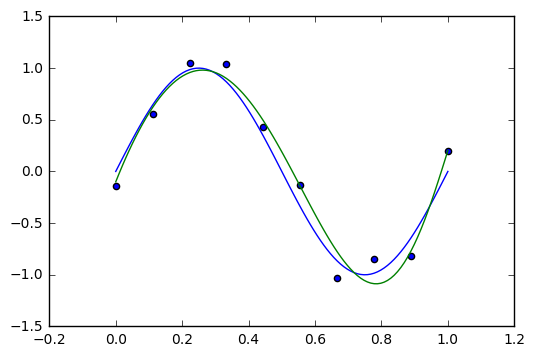

In [8]:
# Let's see the result
plt.plot(hdx, hds)
plt.plot(hdx, hdp)
plt.scatter(x, t)
plt.show()

In [1]:

from scipy import stats
stats.norm.expect(lambda x: x**2)

1.000000000000001